# Gaussian Mixture Model: fixed mean

$$
    y\vert z \sim \mathcal{N}(y\vert\mu, \Sigma_1)^{z} \times \mathcal{N}(y\vert\mu, \Sigma_2)^{1-z} 
$$

$$
    \hat\mu = \frac{1}{N}\sum_{n=1}^N y_n
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from numpy.linalg import inv

In [2]:
%config InlineBackend.figure_format = "retina"

In [3]:
Σ1 = np.array([
    [0.6, 0.2],
    [0.2, 0.3]
])

Σ2 = np.array([
    [0.8, -0.2],
    [-0.2, 1]
])

In [4]:
np.linalg.eigvalsh(Σ2)

array([0.6763932, 1.1236068])

In [5]:
D = np.mgrid[-3:3:0.1, -3:3:0.1]

In [6]:
Norm1 = multivariate_normal(cov=Σ1)
Norm2 = multivariate_normal(cov=Σ2)

In [7]:
Z1 = np.apply_along_axis(Norm1.pdf, 0, D)
Z2 = np.apply_along_axis(Norm2.pdf, 0, D)

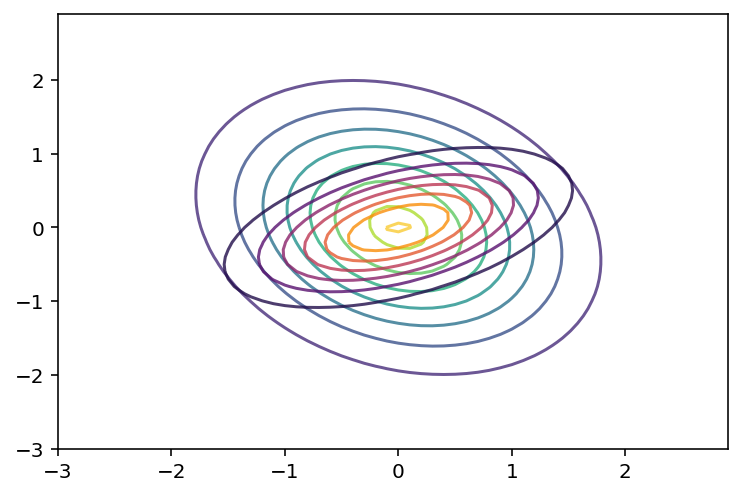

In [8]:
plt.contour(*D, Z2, alpha=0.8)
plt.contour(*D, Z1, cmap="inferno", alpha=0.8)

In [9]:
np.random.seed(3141)
Y1 = Norm1.rvs(30)
Y2 = Norm2.rvs(18)
Y = np.r_[Y1, Y2]
N = len(Y)

## Implementation

In [19]:
np.random.seed(314)
pi = 0.5
Σ1h = np.identity(2) / 5
Σ2h = np.identity(2) / 5
Σh = np.concatenate((Σ1h[None, ...], Σ2h[None, ...]), axis=0)
mu = np.random.randn(2) * 0.2
I2 = np.eye(2)

In [60]:
# Responsibilities
Norm1 = multivariate_normal(mean=mu, cov=Σ1h)
Norm2 = multivariate_normal(mean=mu, cov=Σ2h)

γ1 = pi * Norm1.pdf(Y) / (pi * Norm1.pdf(Y) + (1 - pi) * Norm2.pdf(Y))
γ2 = 1 - γ1
γ = np.c_[γ1, γ2]

N1 = sum(γ1)
N2 = N - N1
Σh_inv = np.linalg.inv(Σh)

# M-step
A = np.einsum("kij,nk->ij", Σh_inv, γ)
B = np.einsum("kij,nk,nj->i", Σh_inv, γ, Y)
mu = inv(A) @ B

diff = mu - Y
Σh = np.einsum("nk,ni,nj->kij", γ, diff, diff) / np.array([N1, N2])[None, None, :]
Σh1, Σh2 = Σh
Σh_inv = np.linalg.inv(Σh)
pi = γ1.mean()

In [67]:
mu

array([0.01253636, 0.18660755])

In [64]:
Y.mean(axis=0)

array([0.01253636, 0.18660755])

In [874]:
def e_step(Y, pi, p1, p2):
    """
    Computation of responsibilities: E-step
    """
    γ1 = pi * p1.pdf(Y) / (pi * p1.pdf(Y) + (1 - pi) * p2.pdf(Y))
    γ2 = 1 - γ1
    γ = np.c_[γ1, γ2]
    
    return γ

In [868]:
Σ1

array([[0.6, 0.2],
       [0.2, 0.3]])

In [869]:
Σh[1]

array([[ 0.16265031, -0.21314093],
       [-0.05945628,  0.89493801]])

In [835]:
Σ2

array([[ 0.8, -0.2],
       [-0.2,  1. ]])

In [871]:
Σh[1]

array([[ 0.16265031, -0.21314093],
       [-0.05945628,  0.89493801]])